In [9]:
import sys
import matplotlib
import numpy as np
import scipy as sp
import sklearn 
import pandas as pd

### 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [10]:
#data_set put in df
df = pd.read_csv('/Users/user/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [11]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
df.shape

(1460, 81)

### 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

### 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。  
各特徴量がどういったものかを見る。（数値データか文字データなど今回の目的変数はどの列か確認する。

### 予測対象は販売価格。
家の備品有無など細かいデータがある

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

特徴量の平均値と標準偏差、四分位数を一度に表示させる

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

各特徴量の欠損値の有無を確認する。  
欠損値の確認にはmissingnoというライブラリを活用しましょう。  
このライブラリにより欠損値の有無が可視化できます。  
インストールや使い方に関しては以下のページをご覧ください。

ResidentMario/missingno: Missing data visualization module for Python.

欠損値が何パーセント含まれるかを確認する

In [15]:
pip install missingno#missingno のインストール

ERROR: Invalid requirement: 'missingno#missingno'
Note: you may need to restart the kernel to use updated packages.


In [16]:
import missingno as msno
msno.matrix(df)

In [17]:
df.isnull().sum()#特徴量ごとのNANの数　

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [18]:
df.dropna(thresh = 1455, axis = 1)#欠損値が５個以上あるサンプルは削除

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
df.dropna()#欠損値が一個でもある行は削除

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

尖度
歪度

### □歪度（わいど）  
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。  
サンプルサイズをn、各データの平均値を、標準偏差をsとすると歪度は次の式から求められます。

「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。


### ■尖度（せんど）  
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。  
サンプルサイズをn、各データの平均値を、標準偏差をsとすると尖度は次の式から求められます。

正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。

例えば、3-2章で用いた生徒の身長のデータ（一部改変）から尖度を算出すると次のようになります（※この図に示した尖度は、すべてのデータが階級値をとった場合の値です）。


### 【問題6】分布の確認
seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。  
目的変数に対して対数変換を行う。  
対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。  
対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。  
このように加工することで予測時の精度を上げることができます。

seaborn.distplot — seaborn 0.9.0 documentation

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


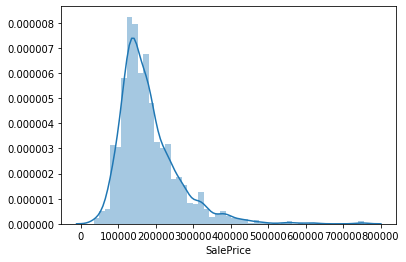

In [20]:
#目的変数　SalesPriceの分布を視覚化
import seaborn as sns
sns.distplot(df.SalePrice)
print("Skewness :", df.SalePrice.skew())
print("Kurtosis :", df.SalePrice.kurt())

In [21]:
df.SalePrice.apply(np.log)#SalePriceを対数変換

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

Skewness : 0.12133506220520406
Kurtosis : 0.8095319958036296


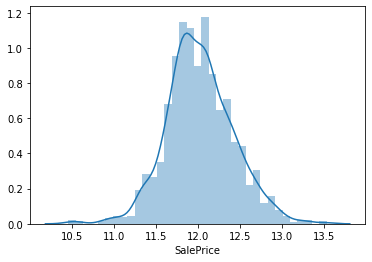

In [22]:
#対数変換あとにグラフ化
import seaborn as sns
sns.distplot(df.SalePrice.apply(np.log))
print("Skewness :", df.SalePrice.apply(np.log).skew())
print("Kurtosis :", df.SalePrice.apply(np.log).kurt())

ゆがんだ分布は，対数変換してやることによって，正規分布に近似できる 。

### 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。  
目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。  
選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。  
選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  
《補足》  
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。  
このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります

In [23]:
len(df.corr())

38

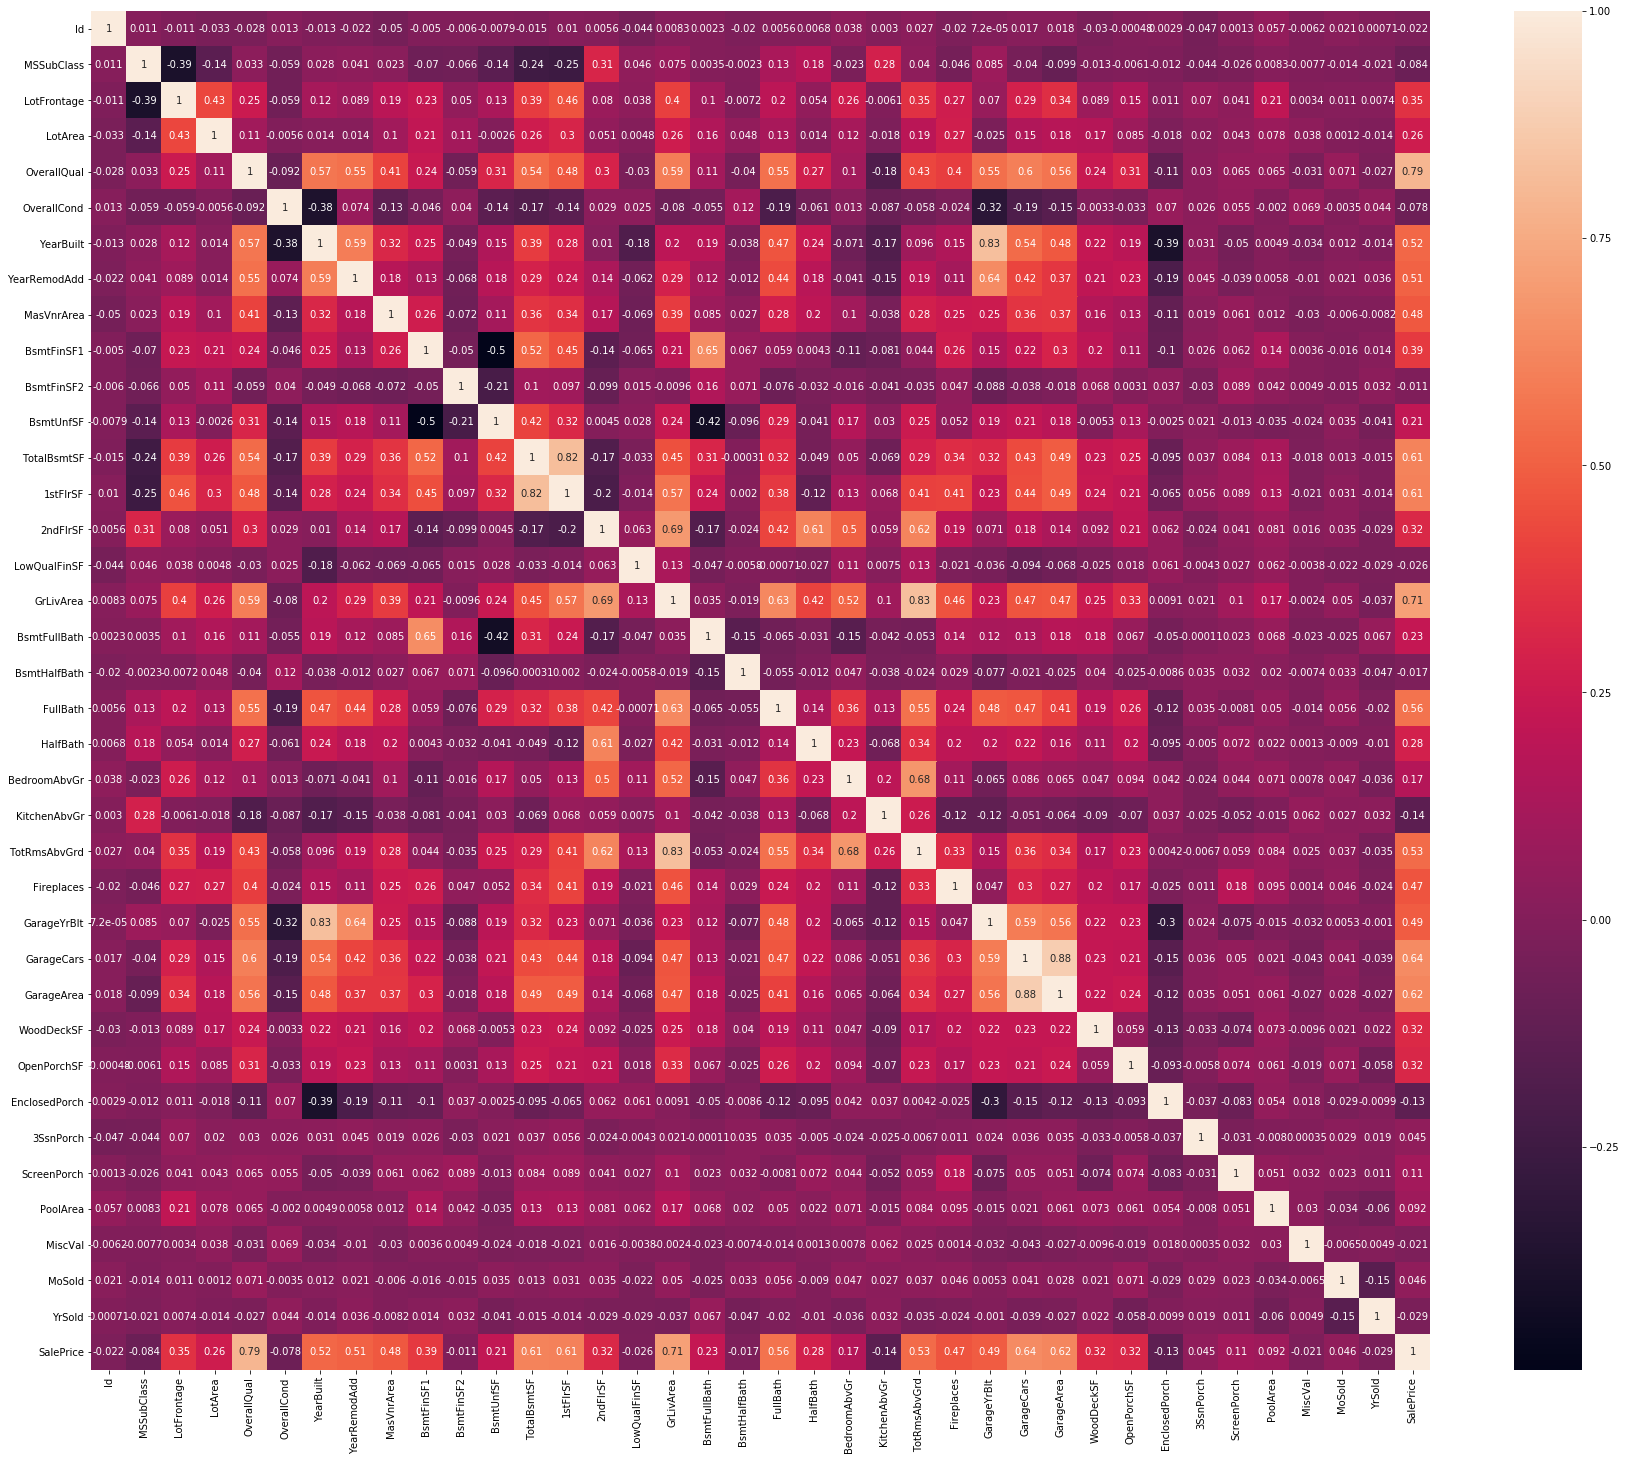

In [24]:
#ヒートマップ作成
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), annot = True)
plt.ylim(len(df.corr()), 0)#端の数値　がちぎれるため。
plt.show()

特徴量は８１個ある　はずだが、数が３８まで減っている　。
NANの特徴量は除外されていると思われる。

In [25]:
#違うやり方表示方法、１０個づつ載せて表示する。
#リスト化　列データ　　を１０個づつ格納する

list_data = []
for i in range(8):
    df_list = [df.iloc[:, 0 + i*10 : 10 + i*10], df.SalePrice]
    list_data.append(pd.concat(df_list, axis = 1))
    

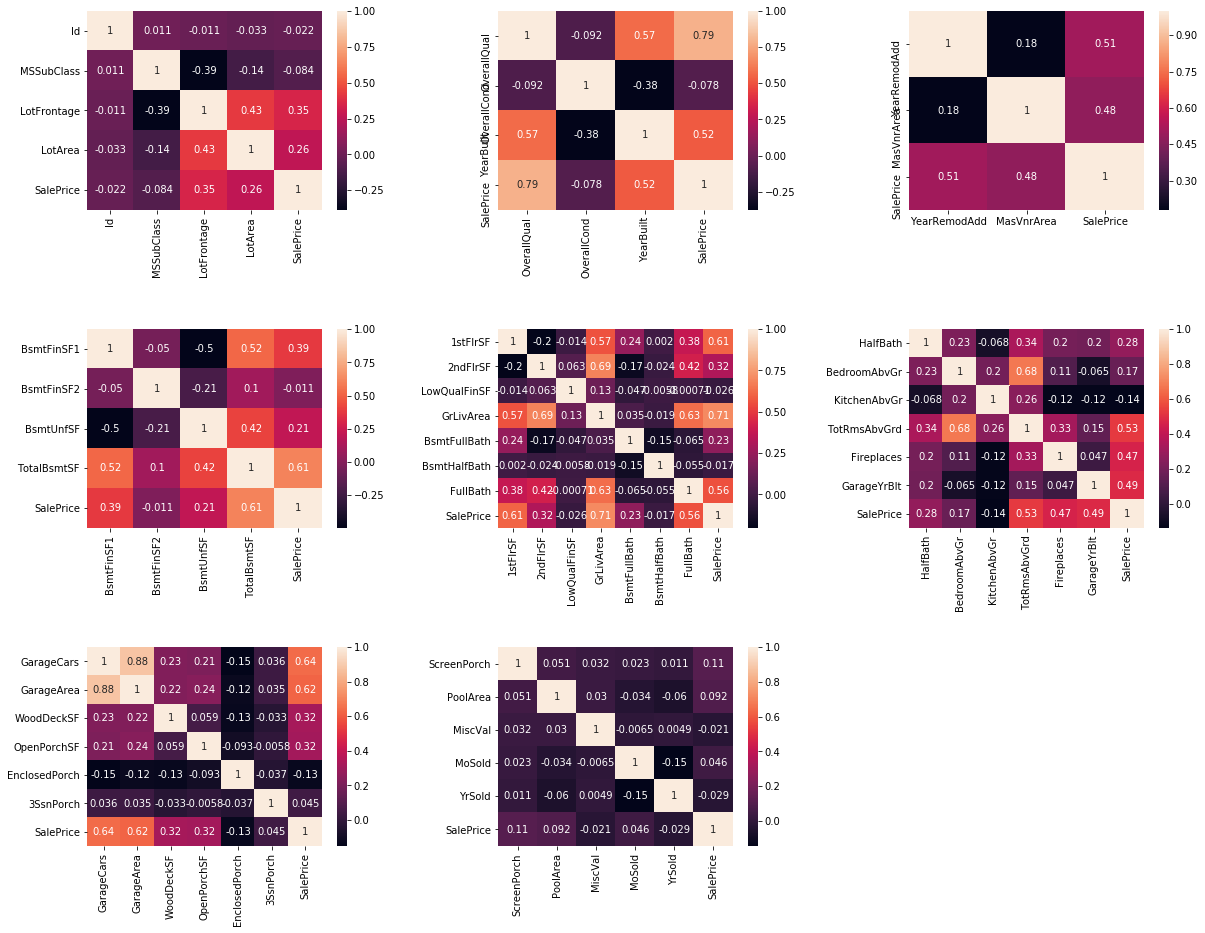

In [26]:
plt.figure(figsize=(20, 700))#figsizeの指定

for i in range(8):
    plt.subplots_adjust(wspace=0.4, hspace=0.6)#軸ラベルがダブらないようにする
    plt.subplot(120,3,i +1)#横３列、縦に１２０、８個表示
    sns.heatmap(list_data[i].corr(), annot= True) 
    plt.ylim(len(list_data[i].corr()), 0)#端の数値　がちぎれるため。
    
plt.show()

In [27]:
#高い順に十個選びやすくした。
saleprice = df.corr().SalePrice

put_L_to_S = sorted(saleprice.items(), key=lambda x:x[1], reverse = True)
put_L_to_S

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838047),
 ('GrLivArea', 0.7086244776126511),
 ('GarageCars', 0.640409197258349),
 ('GarageArea', 0.6234314389183598),
 ('TotalBsmtSF', 0.6135805515591944),
 ('1stFlrSF', 0.6058521846919166),
 ('FullBath', 0.5606637627484452),
 ('TotRmsAbvGrd', 0.5337231555820238),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113867),
 ('GarageYrBlt', 0.48636167748786213),
 ('MasVnrArea', 0.4774930470957107),
 ('Fireplaces', 0.4669288367515242),
 ('BsmtFinSF1', 0.38641980624215627),
 ('LotFrontage', 0.35179909657067854),
 ('WoodDeckSF', 0.32441344456813076),
 ('2ndFlrSF', 0.31933380283206614),
 ('OpenPorchSF', 0.31585622711605577),
 ('HalfBath', 0.2841076755947784),
 ('LotArea', 0.2638433538714063),
 ('BsmtFullBath', 0.22712223313149718),
 ('BsmtUnfSF', 0.214479105546969),
 ('BedroomAbvGr', 0.1682131543007415),
 ('ScreenPorch', 0.11144657114291048),
 ('PoolArea', 0.09240354949187278),
 ('MoSold', 0.04643224522381936),
 ('3SsnPorch', 

In [28]:
top10_saleprice = [('OverallQual', 0.7909816005838047),
 ('GrLivArea', 0.7086244776126511),
 ('GarageCars', 0.640409197258349),
 ('GarageArea', 0.6234314389183598),
 ('TotalBsmtSF', 0.6135805515591944),
 ('1stFlrSF', 0.6058521846919166),
 ('FullBath', 0.5606637627484452),
 ('TotRmsAbvGrd', 0.5337231555820238),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113867)]

In [45]:
#トップ１０　の数値　データ　をリスト化し結合　heatmap
df_heat_list = []

for i in top10_saleprice:
#     print(i[0])
    
    df_heat_list.append(df[i[0]])
    
heatmap_10 = pd.concat(df_heat_list, axis = 1)
heatmap_10

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


In [46]:
heatmap_10.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


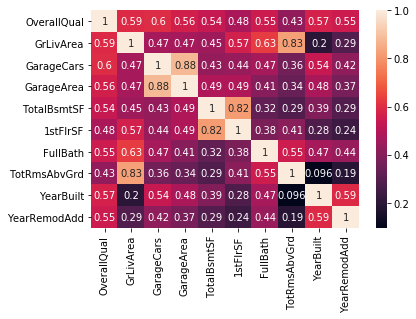

In [38]:
#ヒートマップを作成
sns.heatmap(heatmap_10.corr(), annot= True)
plt.ylim(len(heatmap_10.corr()), 0)
plt.show()

### 相関関係　トップ３  
### GarageArea, GarageCars  0.88　　  
駐車場のスペース　が増えると車の数が増える。（当たり前）  
  
### TotRomsAbvGrd, GrLivArea 0.83  
風呂以外の部屋　数が多いほどリビングが広い。

### 1stFlrSF, TotatlBsmtSF  0.82  
一階のフロアの広さが多いほど風呂が大きい。

出力された結果は現実に対して違和感はなかった。